# ___ResNet - CNN Architecture___

## ___Introduction___

___ResNet is a network structure proposed by the He Kaiming, Sun Jian and others of Microsoft Research Asia in 2015, and won the first place in the ILSVRC-2015 classification task. At the same time, it won the first place in ImageNet detection, ImageNet localization, COCO (Common Objects in Context) detection, and COCO segmentation tasks. It was a sensation at the time.___

_ResNet, also known as __Residual Neural Network__, refers to the idea of adding residual learning to the traditional convolutional neural network, which __solves the problem of gradient dispersion and accuracy degradation (training set) in deep networks__, so that the network can get more and more The deeper, both the accuracy and the speed are controlled._

_There are many variants of ResNet architecture i.e. same concept but with a different number of layers. We have __ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-110, ResNet-152, ResNet-164, ResNet-1202__ etc. The name ResNet followed by a two or more digit number simply implies the ResNet architecture with a certain number of neural network layers._

<a href="https://arxiv.org/pdf/1512.03385.pdf" target="_blank"><i>ResNet Paper: Deep Residual Learning for Image Recognition</i></a>

## ___Understanding the Problems___

_After the first CNN-based architecture (AlexNet) that win the ImageNet 2012 competition, Every subsequent winning architecture uses more layers in a deep neural network to reduce the error rate. This works for less number of layers, but when we __increase the number of layers__, there is a common problem in deep learning associated with that called __Vanishing/Exploding gradient__. This causes the gradient to become 0 or too large. Thus when we increases number of layers, the __training and test error rate also increases__._

### ___Increasing Depth Problem/ Vanishing Gradient Problem___

* _The first problem brought by increasing depth is the problem of __gradient explosion/dissipation__. This is because as the number of layers increases, the __gradient of backpropagation in the network will become unstable__ with continuous multiplication, and __become particularly large or small__._


* _In order __to overcome gradient__ dissipation, many solutions have been devised, such as using __BatchNorm__, replacing the __activation function with ReLu__, using __Xaiver initialization__, etc. It can be said that gradient dissipation has been well solved._


* _Another problem of increasing depth is the __problem of network degradation__, that is, as the __depth increases__, the __performance of the network will become worse and worse__, which is directly __reflected in the decrease in accuracy__ on the training set. The __Residual Network article solves this problem__. And after this problem is solved, the depth of the network has increased by several orders of magnitude.

### ___Degradation of Deep Network/ Decrease in Accuracy___

___With network depth increasing, accuracy gets saturated___ _(which might be unsurprising) and then degrades rapidly. Unexpectedly, such degradation is not caused by overfitting, and adding more layers to a favored deep model leads to higher training error._

<img src='https://cdn-images-1.medium.com/max/1000/0*lRQ0e3h-l9Ab-mRd.png'/>

* _The above figure is the error rate of the training set classified by the network on the CIFAR10-data set with the increase of the network depth. It can be seen that if we directly stack the convolutional layers, as the number of layers increases, the error rate increases significantly. The trend is that the deepest 56-layer network has the worst accuracy. We verified it on the VGG network. For the CIFAR-10 dataset, it took 5 minutes on the 18-layer VGG network to get the full network training. The 80% accuracy rate was achieved, and the 34-layer VGG model took 8 minutes to get the 72% accuracy rate. The problem of network degradation does exist._


* _The decrease in the training set error rate indicates that the problem of degradation is __not caused by overfitting__. The specific reason is that it is left for further study. The author's other paper __"Identity Mappings in Deep Residual Networks"__ proved the occurrence of degradation. It is because the optimization performance is not good, which __indicates that the deeper the network, the more difficult the reverse gradient is to conduct__._

### ___Understanding them together___

___The first problem brought by increasing the network depth is the disappearance and explosion of the gradient.___

_This problem was successfully solved after Szegedy proposed the BN (__Batch Normalization__) structure. The BN layer can normalize the output of each layer. The size can still be kept stable after the reverse layer transfer, and it will not be too small or too large._

___Is it easy to converge after adding Batch Normalization and then increasing the depth?___

_The answer is still __Negative__. The author mentioned the __second problem - the degradation problem__: when the level reaches a certain level, the accuracy will saturate and then decline rapidly. This decline is not caused by the disappearance of the gradient. It is not caused by overfit, but because the network is so complicated that it is difficult to achieve the ideal error rate by unconstrained stocking training alone._

_The degradation problem is not a problem of the network structure itself, but is caused by the current insufficient training methods. The currently widely used training methods, whether it is SGD, AdaGrad, or RMSProp, cannot reach the theoretically optimal convergence result after the network depth becomes larger._

___We can also prove that as long as there is an ideal training method, deeper networks will definitely perform better than shallow networks.___

___The proof process is also very simple___ _: Suppose that several layers are added behind a network A to form a new network B. If the added level is just an identity mapping of the output of A, that is, the output of A is after the level of B becomes the output of B, there is no change, so the error rates of network A and network B are equal, which proves that the deepened network will not be worse than the network before deepening._

## ___Residual Networks/Residual Blocks___

_In principle, neural networks should get better results as they have more layers. A deeper network can learn anything a shallower version of itself can, plus (possibly) more than that. If, for a given dataset, there are no more things a network can learn by adding more layers to it, then it can just learn the identity mapping for those additional layers. In this way, it preserves the information in the previous layers and can not do worse than shallower ones. A network should be able to learn at least the identity mapping if it doesn’t find something better than that._

_But in practice, things are not like that. Deeper networks are harder to optimize. With each extra layer that we add to a network, we add more difficulty in the process of training; it becomes harder for the optimization algorithm that we use to find the right parameters. As we add more layers, the network gets better results until at some point; then as we continue to add extra layers, the accuracy starts to drop._

___Residual Networks attempt to solve this issue by adding the so-called SKIP CONNECTIONS.___ 

## ___Skip Connection/Identity Connections - The Strength of ResNet___

_ResNet first introduced the concept of skip connection. The diagram below illustrates skip connection. The figure on the left is stacking convolution layers together one after the other. On the right we still stack convolution layers as before but we now also add the original input to the output of the convolution block. This is called __skip connection__ or __identity connections__._

<img src='https://miro.medium.com/max/512/1*kanYOsFl0MmaPk5ZWDjJmw.png'/>

_He Kaiming proposed a residual structure to implement the above identity mapping/skip connection (Below Figure):_

_In addition to the normal convolution layer output, the entire module has a branch directly connecting the input to the output. The input and the output of the convolution makes the final output by performing an arithmetic addition._ 

_The formula is $H (x) = F (x) + x$,_

_x is the input,_ 

_F (x) is the output of the convolution branch, and_

_H (x) is the output of the entire structure_

_It can be shown that if all parameters in the F (x) branch are 0, H (x) is an identity mapping._

_The residual structure artificially creates an identity map, which can make the entire structure converge in the direction of the identity map, ensuring that the final error rate will not become worse because the depth becomes larger. If a network can achieve the desired result by simply setting the parameter values by hand, then this structure can easily converge to the result through training._ 

<img src='https://cv-tricks.com/wp-content/uploads/2019/07/Simple_Residual_Block.png' width = 400 height = 500/>

_since Output of Conv Layer, input above are two matrixes, you can add them only if they have the same shape. So if the convolution + batch norm operations are done in a way that the output shape is the same,then we can simply add them as shown below._

<img src='https://miro.medium.com/max/512/1*uyXEvYztiv3fGGCCPbm8Jg.png'/>

_Otherwise, the input goes through a convolution layer chosen such that the output from it is the same dimension as the output from the convolution block as shown below:_

<img src='https://miro.medium.com/max/512/1*U5wkA4O1IpY-ekXqFh0tUQ.png'/>

_One important thing to note here is that the skip connection is applied before the RELU activation as shown in the diagram above. Research has found that this has the best results._

### ___What is the intuition behind the residual block?___

_As we have learned earlier that increasing the number of layers in the network abruptly degrades the accuracy. The deep learning community wanted a deeper network architecture that can either perform well or at least the same as the shallower networks. Now, try to imagine a deep network with convolution, pooling, etc layers stacked one over the other. Let us assume that, the actual function that we are trying to learn after every layer is given by Ai(x) where A is the output function of the i-th layer for the given input x. You can refer to the next screenshot to understand the context. You can see that the output functions after every layer are A1, A2, A3, …. An._

<img src='https://cv-tricks.com/wp-content/uploads/2019/07/Simple_Deep_Network.png' width = 400 height = 500/>

_In this way of learning, the network is directly trying to learn these output functions i.e. without any extra support. Practically, it is not possible for the network to learn these ideal functions (A1, A2, A3, …. An). The network can only learn the functions say B1, B2, B3, …. Bn that are closer to A1, A2, A3, …. An. However, our assumed deep network is so much worse that even it can’t learn B1, B2, B3, …. Bn which will be closer to A1, A2, A3, …. An because of the vanishing gradient effect and also due to the unsupported way of training._

_The support for the training will be given by the identity mapping addition to the residual output. Firstly, let us see what is the meaning of identity mapping? In a nutshell, applying identity mapping to the input will give you the output which is the same as the input ( AI = A: where A is input matrix and I is Identity Mapping)._

_Traditional networks such as AlexNet, VGG-16, etc try to learn the A1, A2, A3, …. An directly as shown in the diagram of the simple deep network. In the forward pass, the input (image) is passed to the network to get the output. The error is calculated and gradients are determined and backpropagation helps the network to approximate the functions A1, A2, A3, …. An in the form of B1, B2, B3, …. Bn. The creators of ResNet thought that:_

___“IF THE MULTIPLE NON-LINEAR LAYERS CAN ASYMPTOTICALLY APPROXIMATE COMPLICATED FUNCTIONS, THEN IT IS EQUIVALENT TO HYPOTHESIZE THAT THEY CAN ASYMPTOTICALLY APPROXIMATE THE RESIDUAL FUNCTION”.___

### ___What is a Residual Function?___ 

_The simple answer to this question is that the residual function (also known as residual mapping) is the difference between the input and output of the residual block under question. In other words, residual mapping is the value that will be added to the input to approximate the final function (A1, A2, A3, …. An) of the block. You can also assume that the residual mapping is the amount of error which can be added to input so as to reach the final destination i.e. to approximate the final function. You can visualize the Residual Mapping as shown in the next figure. You can see that the Residual Mapping is acting as a bridge between the input and the output of the block._

<img src='https://cv-tricks.com/wp-content/uploads/2019/07/visualize_identity_mapping.png' width = 400 height = 500/>

_Let us change our naming conventions to make this post compatible with ResNet paper. Fig-1, shows the residual block. The function which should be learned as a final result of the block is represented as H(x). The input to the block is x and the residual mapping._

### ___Why the Residual Function will work?___ 
_The creators of ResNet again thought as the statement goes:_

___“ RATHER THAN EXPECTING STACKED LAYERS TO LEARN TO APPROXIMATE H(x), THE AUTHORS ARE LETTING THE LAYERS TO APPROXIMATE A RESIDUAL FUNCTION i.e. F(x) = H(x) – x.”___

_The above statement is explaining that during training the deep residual network, the main focus is to learn the residual function i.e. F(x). So, if the network will somehow learn the difference (F(x)) between the input and output, then the overall accuracy can be increased. In other words, the residual value should be learned in a way such that it approaches zero, therefore making the identity mapping optimal. In this way, all the layers in the network will always produce the optimal feature maps i.e. the best case feature map after the convolution, pooling and activation operations. The optimal feature map contains all the pertinent features which can perfectly classify the image to its ground-truth class._

### ___Why identity mapping will work?___ 

___How does the identity connection affect the performance of the network?___

_During the time of backpropagation, there are two pathways for the gradients to transit back to the input layer while traversing a residual block. In the next diagram, you can see that there are two pathways: pathway-1 is the identity mapping way and pathway-2 is the residual mapping way._

<img src='https://cv-tricks.com/wp-content/uploads/2019/07/Grad_path.png' width = 400 height = 500/>

_We have already discussed the vanishing gradients problem in the simple deep network. Now we will try to explain the solution for the same keeping the identity connection in mind. Firstly, we will see how to represent the residual block F(x) mathematically?_

$$y = F(x, {Wi}) + x$$

_where y is the output function, x is the input to the residual block and F(x, {Wi}) is the residual block. Note that the residual block contains weight layers which are represented as Wi where 1 ≤ i ≤ number of layers in a residual block. Also, the term F(x, {Wi}) for 2 weight layers in a residual block can be simplified and can be written as follows:_

$$F(x, {Wi}) = W2 𝛔(W1x)$$
 
_where 𝛔 is the ReLU activation function and the second non-linearity is added after the addition with identity mapping i.e. H(x) = 𝛔( y )._

_When the computed gradients pass from the __Gradient Pathway-2__, two weight layers are encountered which are W1 and W2 in our residual function F(x). The weights or the kernels in the weight layers W1 and W2 are __updated and new gradient__ values are calculated. In the case of initial layers, the newly computed values will either become small or __eventually vanish__. To save the gradient values from vanishing, the shortcut connection (identity mapping) will come into the picture. The gradients can directly pass through the Gradient Pathway-1  shown in the previous diagram. In __Gradient Pathway-1__, the gradients don’t have to encounter any weight layer, hence, there __won’t be any change in the value of computed gradients__. The residual block will be skipped at once and the gradients can reach the initial layers which will help them to learn the correct weights. Also, ResNet version 1 has ReLU function after the addition operation, therefore, gradient values will be changed as soon as they are getting inside the residual block._

### ___How can the Residual Learning solve the problem of "the accuracy of the network deepening declines"?___
_For a neural network model, if the model is optimal, then training can easily optimize the residual mapping to 0, and only identity mapping is left at this time. No matter how you increase the depth, the network will always be in an optimal state in theory. Because it is equivalent to all the subsequent added networks to carry information transmission along the identity mapping (self), it can be understood that the number of layers behind the optimal network is discarded (without the ability to extract features), and it does not actually play a role. In this way, the performance of the network will not decrease with increasing depth._

### ___Effectiveness of ResNet___

_The author used two types of data, **ImageNet** and **CIFAR**, to prove the effectiveness of ResNet:_

_The first is ImageNet. The authors compared the training effect of ResNet structure and traditional structure with the same number of layers. The left side of Figure 3 is a VGG-19 network with a traditional structure (each followed by BN), the middle is a 34-layer network with a traditional structure (each followed by BN), and the right side is 34 layers ResNet (the solid line indicates a direct connection, and the dashed line indicates a dimensional change using 1x1 convolution to match the number of features of the input and output)._ 

_The data on the left shows that the 34-layer network (red line) with the traditional structure has a higher error rate than the VGG-19 (blue-green line). Because the BN structure is added to each layer therefore, the high error is not caused by the gradient disappearing after the level is increased, but by the degradation problem; the ResNet structure on the right side of figure shows that the 34-layer network (red line) has a higher error rate than the 18-layer network (blue-green line)._

_Now, this is because the ResNet structure has overcome the degradation problem. In addition, the final error rate of the ResNet 18-layer network on the right is similar to the error rate of the traditional 18-layer network on the left. This is because the 18-layer network is simpler and can converge to a more ideal result even without the ResNet structure._

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/resnet_arch.png'/>

<img src='https://wiki.tum.de/download/attachments/22578294/Figure%204_f.png?version=1&modificationDate=1486058743743&api=v2'/>

_The ResNet structure like the left side of Fig. 4 is only used for shallow ResNet networks. If there are many network layers, the dimensions near the output end of the network will be very large. Still using the structure on the left side of Fig. 4 will cause a huge amount of calculation. For deeper networks, we all use the __bottleneck structure__ on the right side of Figure 4, first using a 1x1 convolution for dimensionality reduction, then 3x3 convolution, and finally using 1x1 dimensionality to restore the original dimension._

_In practice, considering the cost of the calculation, the residual block is calculated and optimized, that is, the two 3x3 convolution layers are replaced with 1x1 + 3x3 + 1x1 , as shown below. The middle 3x3 convolutional layer in the new structure first reduces the calculation under one dimensionality-reduced 1x1 convolutional layer , and then restores it under another 1x1 convolutional layer, both maintaining accuracy and reducing the amount of calculation._

<img src='https://i.stack.imgur.com/kbiIG.png'/>

_This is equivalent to reducing the amount of parameters for the same number of layers , so it can be extended to deeper models. So the author proposed ResNet with 50, 101 , and 152 layers, and not only did not have degradation problems, the error rate was greatly reduced, and the computational complexity was also kept at a very low level._

_At this time, the error rate of ResNet has already dropped other networks a few streets, but it does not seem to be satisfied. Therefore, a more abnormal 1202 layer network has been built. For such a deep network, optimization is still not difficult, but it appears The problem of overfitting is quite normal. The author also said that the 1202 layer model will be further improved in the future._

___Variants of ResNet___

<img src='https://miro.medium.com/max/1000/1*6ejqUonRpLAC4Cw_HFLo-w.png'/>

## ___Key Features of ResNet___

* _ResNet uses Batch Normalization at its core. The Batch Normalization adjusts the input layer to increase the performance of the network. The problem of covariate shift is mitigated._


* _ResNet makes use of the Identity Connection, which helps to protect the network from vanishing gradient problem._


* _Deep Residual Network uses bottleneck residual block design to increase the performance of the network._

## ___Code Implementation___

In [3]:
# Getting the Data

!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
!unzip -qq Cat_Dog_data.zip

--2020-10-05 08:52:56--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.32.22
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.32.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  16.7MB/s    in 35s     

2020-10-05 08:53:33 (15.6 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [4]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, ResNet50
from keras.applications.imagenet_utils import decode_predictions

from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

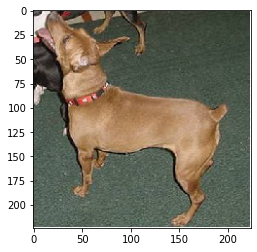

In [5]:
# Ploting the Image

img = image.load_img('/content/Cat_Dog_data/test/dog/dog.10010.jpg', target_size = (224, 224))
plt.imshow(img)

In [6]:
# Preprocessing the image

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

### ___Using the Default Model___

In [7]:
# Using the Default Model

model = ResNet50(weights = 'imagenet')

102973440/102967424 [==============================] - 4s 0us/step


In [8]:
# Prediction

preds = model.predict(img)
print('Predicted:', decode_predictions(preds, top=1))

40960/35363 [==================================] - 0s 0us/step
Predicted: [[('n02107312', 'miniature_pinscher', 0.7305857)]]


### ___Training the Last Layers___

In [9]:
# Download the architecture of ResNet50 with ImageNet weights
base_model = ResNet50(include_top=False, weights='imagenet')
 
# Taking the output of the last convolution block in ResNet50
x = base_model.output
 
# Adding a Global Average Pooling layer
x = GlobalAveragePooling2D()(x)
 
# Adding a fully connected layer having 1024 neurons
x = Dense(1024, activation='relu')(x)
 
# Adding a fully connected layer having 2 neurons which will
# give the probability of image having either dog or cat
predictions = Dense(2, activation='softmax')(x)
 
# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)
 
# Training only top layers i.e. the layers which we have added in the end
for layer in base_model.layers:
    layer.trainable = False

# Compiling the model
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

94773248/94765736 [==============================] - 1s 0us/step


In [10]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
# Creating objects for image augmentations
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
 
test_datagen = ImageDataGenerator(rescale = 1./255)
 
# Proving the path of training and test dataset
# Setting the image input size as (224, 224)
# We are using class mode as binary because there are only two classes in our data
training_set = train_datagen.flow_from_directory(r'/content/Cat_Dog_data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 
test_set = test_datagen.flow_from_directory(r'/content/Cat_Dog_data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [12]:
# Training the model for 2 epochs
model.fit_generator(training_set,
                         steps_per_epoch = 2000,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 1000)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
 704/2000 [=========>....................] - 287s 407ms/step - loss: 0.6854 - accuracy: 0.5888 - val_loss: 0.6499 - val_accuracy: 0.6204


In [13]:
model.predict(img)

array([[3.60068e-05, 9.99964e-01]], dtype=float32)

In [14]:
# Predicting the final class
result = model.predict(img)[0].argmax()
 
# Fetching the class labels
labels = training_set.class_indices
labels = list(labels.items())

In [15]:
# Printing the final label
for label, i in labels:
    if i == result:
        print("The test image has: ", label)
        break

The test image has:  dog


## ___ResNet – V2___

_Till now we have discussed the ResNet50 version 1. Now, we will discuss the ResNet50 version 2 which is all about using the pre-activation of weight layers instead of post-activation. The figure below shows the basic architecture of the post-activation (original version 1) and the pre-activation (version 2) of versions of ResNet._

<img src='https://cv-tricks.com/wp-content/uploads/2019/07/xrv1_vs_rv2.png.pagespeed.ic.6IeCTrxpcu.webp'/>

_The major differences between ResNet – V1 and ResNet – V2 are as follows:_

* _ResNet V1 adds the second non-linearity after the addition operation is performed in between the x and F(x). ResNet V2 has removed the last non-linearity, therefore, clearing the path of the input to output in the form of identity connection._
* _ResNet V2 applies Batch Normalization and ReLU activation to the input before the multiplication with the weight matrix (convolution operation). ResNet V1 performs the convolution followed by Batch Normalization and ReLU activation._

<img src='https://cv-tricks.com/wp-content/uploads/2019/07/xdiff_rv1_rv2-1.png.pagespeed.ic.M3tavBEqjk.webp'/>

_The ResNet V2 mainly focuses on making the second non-linearity as an identity mapping i.e. the output of addition operation between the identity mapping and the residual mapping should be passed as it is to the next block for further processing. However, the output of the addition operation in ResNet V1 passes from ReLU activation and then transferred to the next block as the input._

_When the function ‘f’ is an identity function the signal can be directly propagated between any two units. Also, the gradient value calculated at the output layer can easily reach the initial layer without any change in signal._